In [8]:
import pandas as pd
import os

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']

ave_dataframe = pd.DataFrame()

for data_set in data_sets:
    for model in models:
        file_name = f"../../results/{data_set}_{model}_results.csv"
        if os.path.exists(file_name):
            df = pd.read_csv(file_name)
            numeric_cols = df.select_dtypes(include=[int, float]).columns
            averages = df[numeric_cols].mean()
            print(f"Model: {model}, Data Set: {data_set}")
            print(averages)
            print("\n")
            


Model: base, Data Set: wind
Timestamp    1698274437.8365
Train_time            2.1231
RMSE                  1.1822
MAE                   0.8565
MSE                   1.5130
R2_Score              0.8402
Test_time             0.0016
dtype: float64


Model: new, Data Set: wind
Timestamp      1698396123.9307
Train_time            126.3357
RMSE                    3.4893
MAE                     3.1602
MSE                    21.7282
R2_Score               -1.2943
Test_time               0.0099
Neuron_Count           26.8333
dtype: float64


Model: base, Data Set: nyse
Timestamp    1698276570.3617
Train_time          231.7314
RMSE                 10.9839
MAE                  10.2571
MSE                 144.6679
R2_Score              0.9872
Test_time             0.0674
dtype: float64


Model: new, Data Set: nyse
Timestamp      1698390860.7227
Train_time            304.4448
RMSE                  561.0629
MAE                   546.2972
MSE                567041.4259
R2_Score              -49.2812

In [9]:
import pandas as pd
import os

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']

for data_set in data_sets:
    for model in models:
        file_name = f"../../results/{data_set}_{model}_results.csv"
        if os.path.exists(file_name):
            df = pd.read_csv(file_name)
            numeric_cols = df.select_dtypes(include=[int, float]).columns
            std_devs = df[numeric_cols].std()
            print(f"Model: {model}, Data Set: {data_set}")
            print(std_devs)
            print("\n")


Model: base, Data Set: wind
Timestamp    1575.6746
Train_time      0.6908
RMSE            0.3457
MAE             0.3210
MSE             1.2889
R2_Score        0.1361
Test_time       0.0007
dtype: float64


Model: new, Data Set: wind
Timestamp      62258.3928
Train_time       170.1805
RMSE               3.1436
MAE                3.1657
MSE               32.0883
R2_Score           3.3883
Test_time          0.0043
Neuron_Count       7.8744
dtype: float64


Model: base, Data Set: nyse
Timestamp    2399.0538
Train_time     51.2290
RMSE            4.9851
MAE             5.0975
MSE           125.8675
R2_Score        0.0112
Test_time       0.0033
dtype: float64


Model: new, Data Set: nyse
Timestamp       57496.2133
Train_time        259.7572
RMSE              510.8308
MAE               513.1949
MSE            952434.0677
R2_Score           84.4550
Test_time           0.0159
Neuron_Count        5.1591
dtype: float64


Model: base, Data Set: covid
Timestamp    400.8176
Train_time    22.1367
RMS

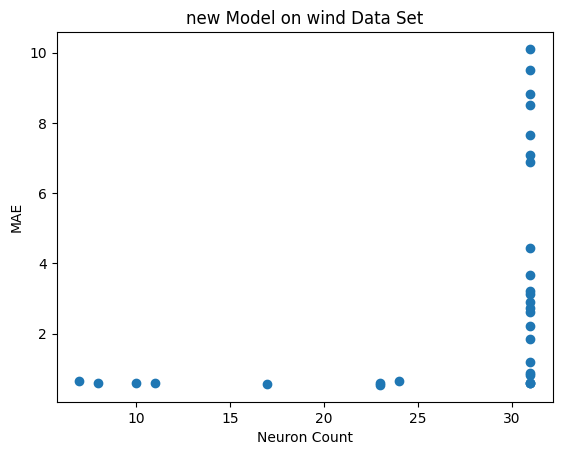

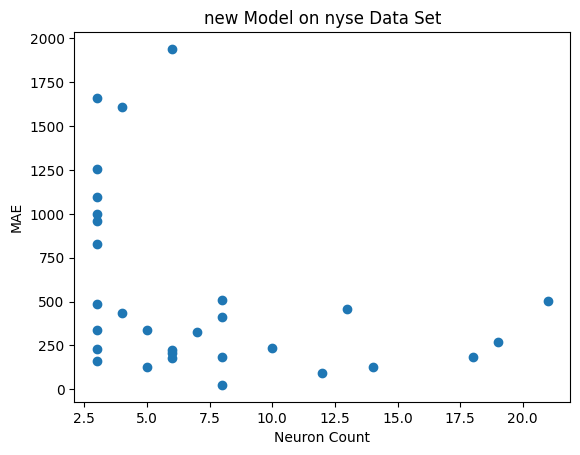

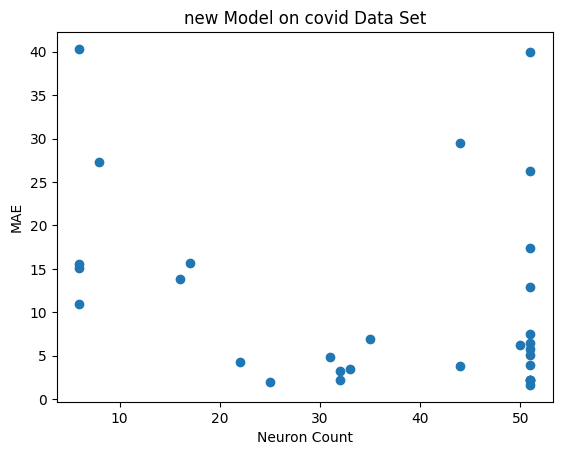

In [10]:
# Code to plot the model size vs MAE in scatter plot
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']

for data_set in data_sets:
    file_name = f"../../results/{data_set}_new_results.csv"
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
        plt.scatter(df['Neuron_Count'], df['MAE'])
        plt.xlabel('Neuron Count')
        plt.ylabel('MAE')
        plt.title(f'{model} Model on {data_set} Data Set')
        plt.show()

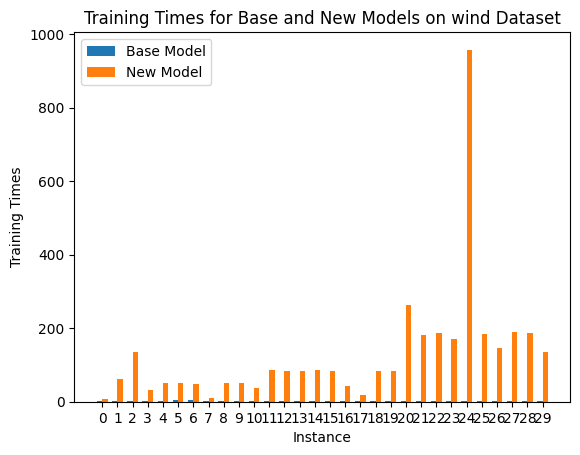

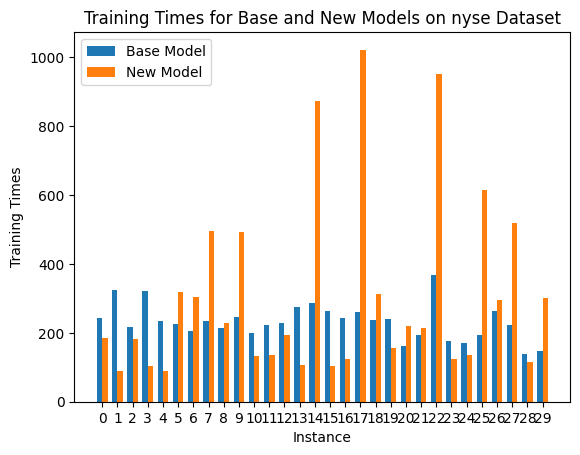

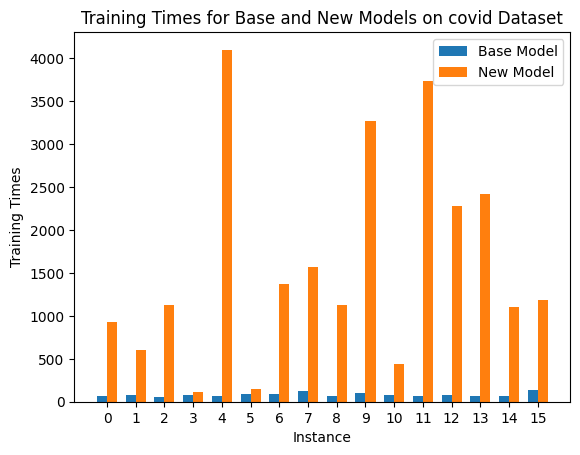

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']

for data_set in data_sets:
    # Assuming both base and new results exist for each dataset
    base_file = f"../../results/{data_set}_base_results.csv"
    new_file = f"../../results/{data_set}_new_results.csv"

    if os.path.exists(base_file) and os.path.exists(new_file):
        df_base = pd.read_csv(base_file)
        df_new = pd.read_csv(new_file)

        # Extract training times for both models
        base_training_times = df_base['Train_time']
        new_training_times = df_new['Train_time']

        # Choose the shorter training times if there's a mismatch in length
        min_length = min(len(base_training_times), len(new_training_times))
        base_training_times = base_training_times[:min_length]
        new_training_times = new_training_times[:min_length]

        bar_width = 0.35
        index = range(min_length)

        plt.bar(index, base_training_times, bar_width, label='Base Model')
        plt.bar([i + bar_width for i in index], new_training_times, bar_width, label='New Model')

        plt.xlabel('Instance')
        plt.ylabel('Training Times')
        plt.title(f'Training Times for Base and New Models on {data_set} Dataset')
        plt.xticks([i + bar_width / 2 for i in index], index)
        plt.legend()
        plt.show()


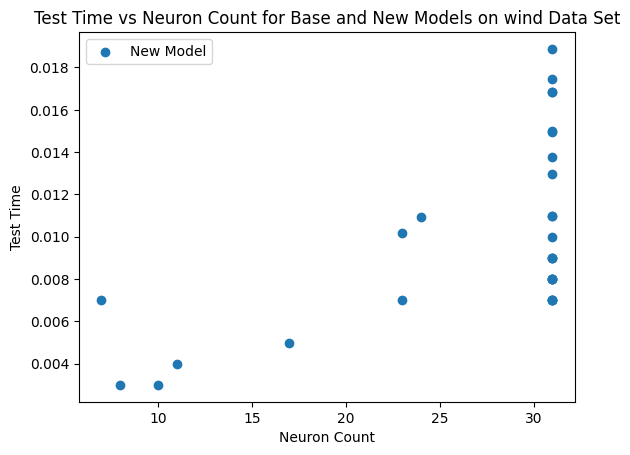

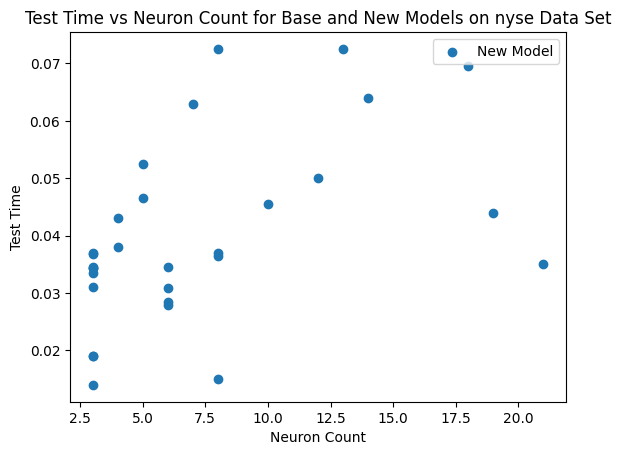

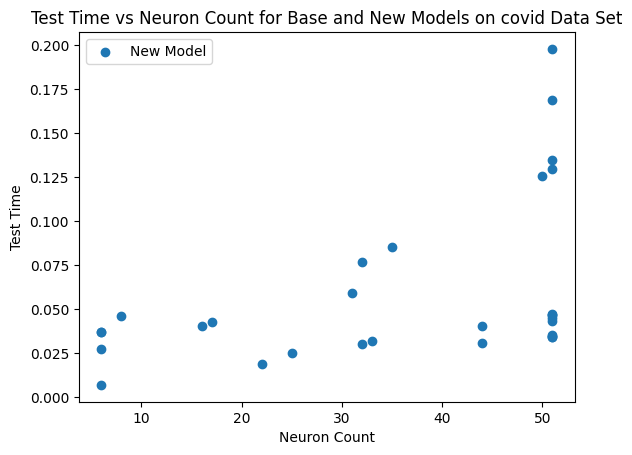

In [12]:
# Compare model size vs test time
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']

for data_set in data_sets:
    file_name_base = f"../../results/{data_set}_base_results.csv"
    file_name_new = f"../../results/{data_set}_new_results.csv"

    if os.path.exists(file_name_base) and os.path.exists(file_name_new):
        df_base = pd.read_csv(file_name_base)
        df_new = pd.read_csv(file_name_new)

        plt.scatter(df_new['Neuron_Count'], df_new['Test_time'], label='New Model')

        plt.xlabel('Neuron Count')
        plt.ylabel('Test Time')
        plt.title(f'Test Time vs Neuron Count for Base and New Models on {data_set} Data Set')
        plt.legend()
        plt.show()


In [13]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)

models = ['base', 'new']
data_sets = ['wind', 'nyse', 'covid']
sub_epoch_tots = {'wind': 40, 'nyse': 10, 'covid': 15}

# Create a list of all combinations of models and datasets
combinations = [(model, data_set) for model in models for data_set in data_sets]

# Create a dictionary to hold the combined data for each combination
combined_data = {}

for model, data_set in combinations:
    # Define the pattern for file name matching
    file_pattern = f"../../results/{data_set}_{model}_loss_*.csv"

    # Find files that match the pattern
    matching_files = glob.glob(file_pattern)

    # Load the data from matching files for each combination
    data = []
    for file in matching_files:
        df = pd.read_csv(file)
        # Extract timestamp from the file name
        timestamp = os.path.basename(file).split('_')[-1][:-4]  # Assuming '.csv' extension
        # Add a 'Timestamp' column with the file's timestamp
        df['Timestamp'] = timestamp
        if model == 'new' and 'epoch' in df.columns and data_set in sub_epoch_tots:
            df['new_epoch'] = df['epoch'] * sub_epoch_tots[data_set] + df['subepoch']
        data.append(df)

    # Concatenate the data for each combination and store in the dictionary
    combined_data[(model, data_set)] = pd.concat(data, ignore_index=True)
combined_data


{('base',
  'wind'):      epoch  train_loss  val_loss          Timestamp
 0        0      0.0647    0.0549  1698272236.498969
 1        1      0.0100    0.0113  1698272236.498969
 2        2      0.0065    0.0084  1698272236.498969
 3        3      0.0917    0.1072  1698272236.498969
 4        4      0.0257    0.0299  1698272236.498969
 ..     ...         ...       ...                ...
 877     28      0.0048    0.0058  1698275551.530768
 878     29      0.0049    0.0055  1698275551.530768
 879     30      0.0051    0.0062  1698275551.530768
 880     31      0.0050    0.0057  1698275551.530768
 881     32      0.0051    0.0060  1698275551.530768
 
 [882 rows x 4 columns],
 ('base',
  'nyse'):       epoch  train_loss  val_loss          Timestamp
 0         0      0.0068    0.0049  1698272501.325354
 1         1      0.0053    0.0035  1698272501.325354
 2         2      0.0055    0.0037  1698272501.325354
 3         3      0.0046    0.0030  1698272501.325354
 4         4      0.0041   

In [14]:
graph_output_dir = 'loss_graphs'
os.makedirs(graph_output_dir, exist_ok=True)

for key, value in combined_data.items():
    if key[0] == 'base':
        grouped = value.groupby('epoch')
    elif key[0] == 'new':
        grouped = value.groupby('new_epoch')

    stats = grouped.agg({'train_loss': ['mean', 'std'], 'val_loss': ['mean', 'std']})

    for loss_type in ['train_loss', 'val_loss']:
        plt.figure()
        plt.plot(stats.index, stats[loss_type]['mean'], label=loss_type.capitalize())
        plt.fill_between(stats.index, stats[loss_type]['mean'] - stats[loss_type]['std'], stats[loss_type]['mean'] + stats[loss_type]['std'], alpha=0.2)
        plt.xlabel('Epoch' if key[0] == 'base' else 'Subepoch')
        plt.ylabel('Loss')
        plt.title(f'{key[1]} - {key[0]} Model - {loss_type.capitalize()}')
        plt.legend()

        # Save the graph to the output directory
        graph_filename = f'{graph_output_dir}/{key[1]}_{key[0]}_{loss_type}_graph.png'
        plt.savefig(graph_filename)
        plt.close()


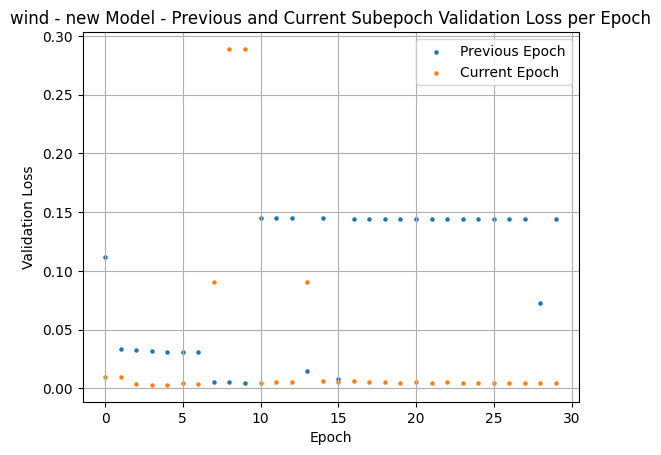

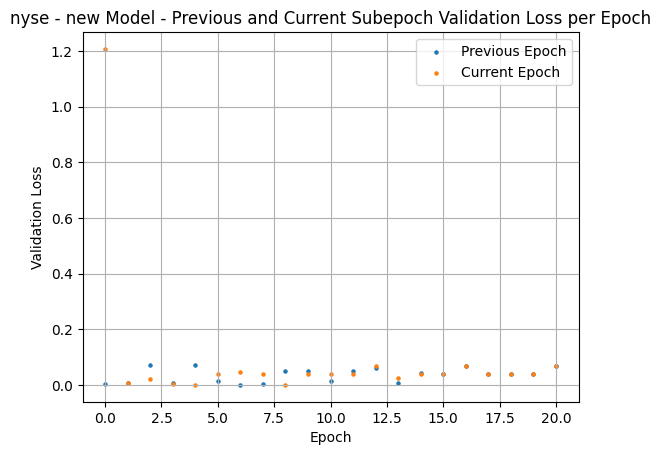

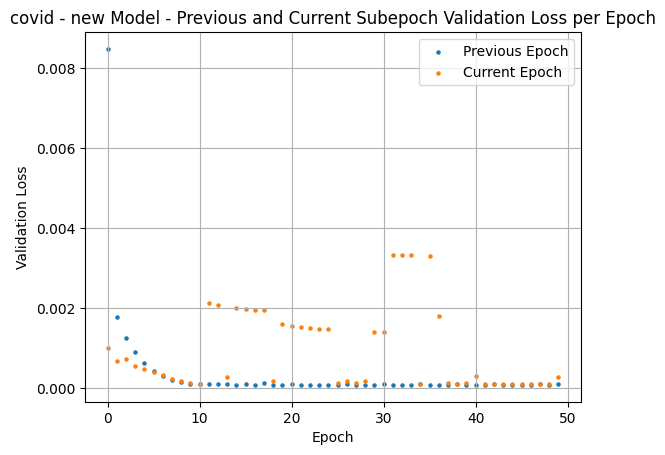

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Assuming you have the combined_data with appropriate columns: 'epoch', 'subepoch', 'val_loss'

graph_output_dir = 'loss_graphs'
os.makedirs(graph_output_dir, exist_ok=True)

for key, value in combined_data.items():
    if key[0] == 'new':  # Only perform operations on the 'new' model
        value = value.set_index('epoch')  # Setting the index to 'epoch'

        # Sort the subepochs within each epoch to get the first and last subepochs
        sorted_data = value.sort_values('subepoch')

        # Group by epoch to obtain the first and last subepochs' validation losses
        first_losses = sorted_data.groupby('epoch')['val_loss'].nth(0)
        last_losses = sorted_data.groupby('epoch')['val_loss'].nth(-1)

        plt.figure()
        plt.scatter(first_losses.index, first_losses, label='Previous Epoch', marker='o', s=5)  # Modify the 's' value here
        plt.scatter(last_losses.index, last_losses, label='Current Epoch', marker='o', s=5)  # Modify the 's' value here
        plt.xlabel('Epoch')
        plt.ylabel('Validation Loss')
        plt.title(f'{key[1]} - {key[0]} Model - Previous and Current Subepoch Validation Loss per Epoch')
        plt.legend()
        plt.grid(True)
        # plt.savefig(f'{graph_output_dir}/{key[1]}_{key[0]}_val_loss_previous_current.png')
        # plt.close()
        plt.show()